# Titanic: Machine Learning from Disaster

## Introduction

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

** Import dependencies **

In [168]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

** Variable Descriptions **

* **survival**: Survival (0 = No; 1 = Yes)
* **pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **name**: Name
* **sex**: Sex
* **age**: Age
* **sibsp**: Number of Siblings/Spouses Aboard
* **parch**: Number of Parents/Children Aboard
* **ticket**: Ticket Number
* **fare**: Passenger Fare
* **cabin**: Cabin
* **embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Read the Data

Read the data and diplay the first 5 rows

In [169]:
titanic = pd.read_csv("data/train.csv")

# display the 5 first rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Lets see how many non-NA/null observations there are for every variable

In [170]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Cleaning the Data

Cabin seems to have a lot of missing values, so we drop it (for now).

In [171]:
# Let's keep only the complete records for visualization purposes
df = titanic
df = df.drop(['Cabin'], axis=1)
df = df.dropna()

Lets see how many rows we have left

In [172]:
len(df)

712

Calculate some basic statistical figures for the non-categorical columns

In [173]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Plotting the Features

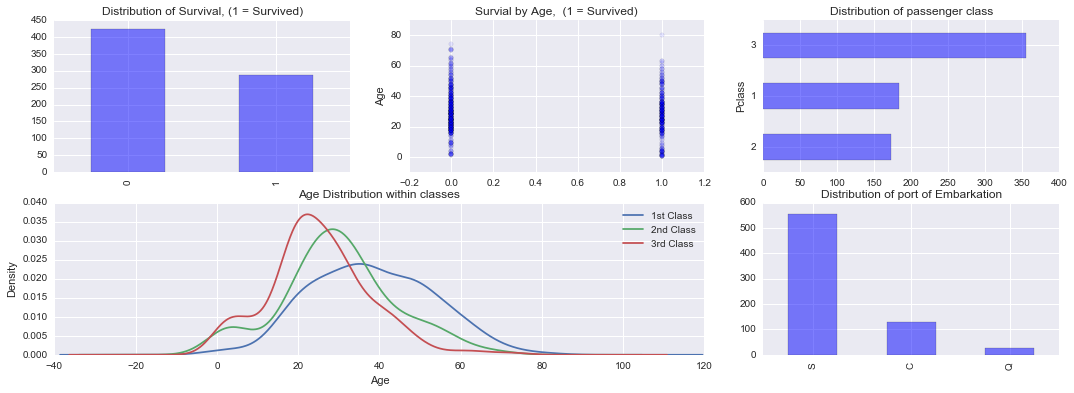

In [174]:
fig = plt.figure(figsize=(18, 6)) 

plt.subplot2grid((2, 3), (0, 0))
df.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(df.Survived, df.Age, alpha=0.1)
plt.ylabel("Age")
plt.title("Survial by Age,  (1 = Survived)")

plt.subplot2grid((2, 3), (0, 2))
df.Pclass.value_counts(ascending=True).plot(kind='barh', alpha=0.5)
plt.ylabel("Pclass")
plt.title("Distribution of passenger class")
 
plt.subplot2grid((2, 3),(1, 0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'), loc='best')

plt.subplot2grid((2, 3), (1, 2))
df.Embarked.value_counts().plot(kind='bar', alpha=0.5);
plt.title("Distribution of port of Embarkation")

## Exploratory Data Analysis

We wish to predict whether or not a passenger will survive or not. We are therefore interested in finding out what information or features can help us determine the probability that a passenger survived or perished.

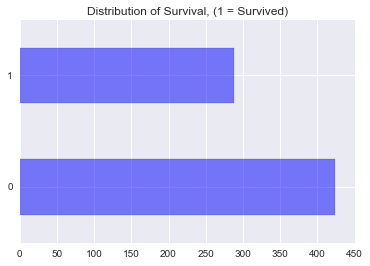

In [175]:
df.Survived.value_counts().plot(kind='barh', alpha=.5)
plt.title("Distribution of Survival, (1 = Survived)");

### Let us start breaking it down by gender

> **Women** and children first is a historical code of conduct whereby the lives of women and children were to be saved first in a life-threatening situation (typically abandoning ship, when survival resources such as lifeboats were limited).

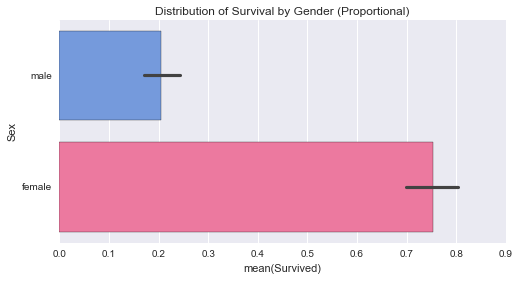

In [212]:
# Custom color palette for our plots
pal = dict(male="#6495ED", female="#FF6699")

plt.figure(figsize=(8, 4))
g = sns.barplot(y="Sex", x="Survived", data=df, palette=pal)
plt.title("Distribution of Survival by Gender (Proportional)");

We could also get the raw numbers using the groupby function in Pandas

In [178]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.752896
male,0.205298


As you can see females had a significantly higher change of surviving (75.29%) compared to males (20.53%).

## Passenger Class

> Some random quote about income and life expectancy

We can further break down the data by looking at multiple variables at the same time. Here we will look at the survival rates grouped by passenger class and gender.

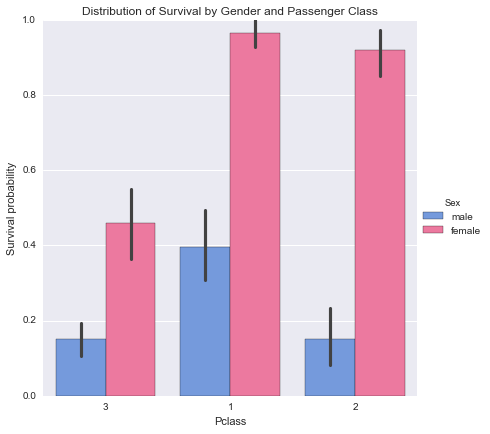

In [189]:
plt.figure(figsize=(6, 2))
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df,
                   size=6, kind="bar", palette=pal)
g.set_ylabels("Survival probability")
plt.title("Distribution of Survival by Gender and Passenger Class");

We can also get the exact numbers using the pivot_table functionality of Pandas

In [190]:
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.963855,0.918919,0.460784
male,0.396040,0.151515,0.150198


The data clearly shows that the a higher passenger class meant a higher change of survival. 

## Age

> Women and **children** first...

Lets see how the passengers age affected their chance of survival

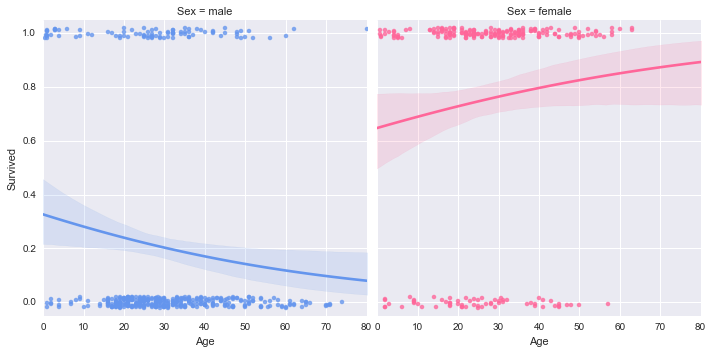

In [191]:
g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

We could also extend our pivot table from the passenger class example by also considering the age of the passengers. Lets group the passengers into two bins: children and adults.

In [192]:
age = pd.cut(df['Age'], [0, 18, 80])
df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972222  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can see that young males in particular have a much higher chance of surving than males above the age of 18.

## Model Building

But before we start, lets pre-process the data so it works better with **sklearn**

### Pre-Processing

Lets also take a look at our testset

In [193]:
test = pd.read_csv("data/test.csv")
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

As you can see our testset also have some missing values. Let's combine our training and test data and start cleaning

In [200]:
combined = pd.concat([titanic, test])
combined.count()

Age            1046
Cabin           295
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
dtype: int64

#### Categorical Values

Since sklearn does not play nice with categorical values we have to convert them

In [201]:
combined.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [202]:
def convert_categorical(dataframe, features):
    # Create dummy variables
    d = [pd.get_dummies(dataframe[c], prefix=c) for c in features]
    # Add dummy variables to df
    dataframe = pd.concat((dataframe, pd.concat(d, axis=1)),axis=1)
    # Drop the converted variables
    dataframe = dataframe.drop(features, axis=1)
    return dataframe

# Categorical features with non-missing values
categorical = ['Pclass','Sex']

combined = convert_categorical(combined, categorical)

combined.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
SibSp            int64
Survived       float64
Ticket          object
Pclass_1       float64
Pclass_2       float64
Pclass_3       float64
Sex_female     float64
Sex_male       float64
dtype: object

#### Missing Age Values

We are missing a lot of age values, but we do not wish to throw away over 200 rows, or 20% of our total data. Instead we could e.g.:

* **Easy**: Calculate the mean age value and use this to fill the missing values
* **Sophisticated**: Make a linear model to predict the missing values

Before we start i would also like to mention that we are facing the same issue in our test-data. We would also like to clean this up while we are at it.

In [203]:
# again, let's drop the cabin column
combined = combined.drop(['Cabin'], axis=1)

# Fill the missing values of Embarked with the most common value ("S")
combined.Embarked[combined.Embarked.isnull()] = combined.Embarked.dropna().mode().values

# Convert Embarked into dummy/indicator variables
combined = convert_categorical(combined, ["Embarked"])

The easy solution

In [112]:
#combined["Age"] = combined["Age"].fillna(combined['Age'].mean());
#combined["Fare"] = combined["Fare"].fillna(combined["Fare"].mean())

A more sophisticated solution where we predict the missing values for age fare

In [205]:
from sklearn.linear_model import LinearRegression

def predict_missing(df, label, features):
    # Rows where the label value is known
    known = df.loc[~df[label].isnull()]
    # Rows where the label value is unknown
    missing = df.loc[df[label].isnull()]
    X = known[list(features)].values
    y = known[label].values
    X_missing = missing[list(features)].values
    rtr = LinearRegression().fit(X, y)
    predicted = rtr.predict(X_missing)
    df.loc[(df[label].isnull()), label] = predicted
    return df

features = ["Parch",
            "Embarked_C",
            "Embarked_Q",
            "Embarked_S",
            "Pclass_1",
            "Pclass_2",
            "Pclass_3",
            "Sex_female",
            "Sex_male",
            "SibSp"]

missing = ["Age", "Fare"]

# Predict the missing values for Age and Fare
for m in missing:
    combined = predict_missing(combined, m, features)

combined.count()

Age            1309
Fare           1309
Name           1309
Parch          1309
PassengerId    1309
SibSp          1309
Survived        891
Ticket         1309
Pclass_1       1309
Pclass_2       1309
Pclass_3       1309
Sex_female     1309
Sex_male       1309
Embarked_C     1309
Embarked_Q     1309
Embarked_S     1309
dtype: int64

In [206]:
from sklearn.preprocessing import StandardScaler

print("Before")
print(combined['Age'].mean())
print()

# scaling
scaler = StandardScaler(with_mean=True)
combined['Age'] = scaler.fit_transform(combined['Age'].reshape(-1, 1))

print("After")
print(combined['Age'].mean())

Before
29.5118605567

After
8.00649759546e-17


### Final Touches

Lets split our combined and cleaned dataset back into a training- and test set and only keep a subset of our features as input for our models.

In [207]:
# lets split or dataset back into training and test sets
train = combined[~combined.Survived.isnull()]
test = combined[combined.Survived.isnull()]

features = ["Age",
            "Embarked_C",
            "Embarked_Q",
            "Embarked_S",
            "Fare",
            "Parch",
            "Pclass_1",
            "Pclass_2",
            "Pclass_3",
            "Sex_female",
            "Sex_male",
            "SibSp"]

label = "Survived"

# create our new training set
X, y = train[list(features)].values, train[label].values

# create our new test set
X_test_set = test[list(features)]

### Random Forest

> Random forests are an ensemble learning method for classification (and regression) that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes output by individual trees.

In [214]:
from sklearn.ensemble import RandomForestClassifier

# Fit the random forest classifier
clf = RandomForestClassifier(n_estimators=500).fit(X, y)

clf.score(X, y)

0.98204264870931535

It is **generally not a good idea to test our model on the same data used for training**. If we optimize our estimator this way, we will tend to over-fit the data: that is, we learn the noise.

#### Hold-out datasets

A better way to test a model is to use a hold-out set which doesnt enter the training.

In [215]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

# Generate a 75:25 hold-out dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model model
clf.fit(X_train, y_train)

# Predict labels for our hold-out dataset
y_pred = clf.predict(X_test)

# Score our new model
clf.score(X_test, y_test)

0.81165919282511212

In this particular case - data is extremely limited. One of the main problems with validation sets is that you "lose" some of the data, for example in the above example we only used 75% of our data to train the model. Another option is to use **K-fold cross-validation** where you split the data into K chunks and perform K fits, where each chunk gets a turn as the validation set.

In [216]:
from sklearn.cross_validation import cross_val_score

#Perform 10-fold cross validation
cv = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=10)

# Mean model score
cv.mean()

0.80265548745885817

This will give us an even better idea of how well our model is doing. Lets see if we can improve our models performance by finding the optimal parameters through search

### Finding the optimal model parameters

In [211]:
from time import time
from sklearn.grid_search import GridSearchCV

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, 7, None],
              "n_estimators": [500, 2000, 5000],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

start = time()

# this may take some minutes...
rf = GridSearchCV(clf, param_grid=param_grid, cv=3, n_jobs=-1).fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf.grid_scores_)))
print()

print("Best Parameters")
print(rf.best_params_)
print()

print("Best Score")
print(rf.best_score_)

GridSearchCV took 94.58 seconds for 36 candidate parameter settings.

Best Parameters
{'max_depth': 7, 'bootstrap': False, 'n_estimators': 2000, 'criterion': 'gini'}

Best Score
0.824915824916


We could also try out another method from sklearn.ensemble such as e.g. gradient boosting

In [217]:
from sklearn.ensemble import GradientBoostingClassifier

est = GradientBoostingClassifier(n_estimators=3000)

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9],
              'max_features': [1.0, 0.3, 0.1]}

start = time()

# this may take some minutes...
gb = GridSearchCV(est, param_grid, n_jobs=-1).fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(gb.grid_scores_)))
print()

print("Best Parameters")
print(gb.best_params_)
print()

print("Best Score")
print(gb.best_score_)

GridSearchCV took 152.76 seconds for 72 candidate parameter settings.

Best Parameters
{'max_depth': 4, 'max_features': 0.1, 'learning_rate': 0.01, 'min_samples_leaf': 9}

Best Score
0.835329341317


### Making Predictions

In [218]:
# predict outcomes for the test set
Y_pred = rf.predict(X_test_set)

# get the passenger ids
pid = test["PassengerId"].values

csv = np.column_stack((pid, Y_pred))

# Generate submission file
np.savetxt("titanic.csv", csv, delimiter=",", fmt="%d", header="PassengerId,Survived", comments='')